
# Fake News Detection ML code

### WARNING!
Careful to have at least 6 GB of RAM availabe when you start the code. You may run into problem with large dataset.

### TODO

1) Check out the PAC-II with the squared_hinge loss function

2) Explore other properties of PAC and LSVC

3) The web app (?)

4) Try from sklearn.linear_model import [SGDClassifier](https://scikit-learn.org/stable/auto_examples/linear_model/plot_sgd_comparison.html#sphx-glr-auto-examples-linear-model-plot-sgd-comparison-py) with SGDClassifier(average=True)
...seems promising


5) We need to check the impact of max_df in the TfidfVectorizer

6) Issues in the dataset. Many news are just articles....


## Import packages

In [6]:
import numpy as np
import pandas as pd   #data storage
import itertools

#Useful functions
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

#Preprocessors
from sklearn.feature_extraction.text import TfidfVectorizer
#try also the more complex spacy

#Link for a full list of classifiers in sklearn
#https://scikit-learn.org/stable/search.html?q=classifier

#DIFFERENT CLASSIFIERS
from sklearn.linear_model import PassiveAggressiveClassifier 
from sklearn.svm import SVC,LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

# 

# Passive Aggressive Classifier: 92.82% for max_iter=50
#pac=PassiveAggressiveClassifier(max_iter=50)

# Multinomial Bayes Classifier (keeping Alpha small but >0 seems to be good, over 90% accuracy
#pac=MultinomialNB(alpha=0.01)

# Decision Tree Classifier: around 80% on the first try
#pac = DecisionTreeClassifier()

# Random Forest Classifier: 90.69% on the first try
#pac = RandomForestClassifier()

# K Neighbors Classifier: 56.12% on the first try
#pac = KNeighborsClassifier()

# MLP Classifier: much longer computation time but also 92.82% accuracy
#pac = MLPClassifier()


import gc
import io
import time
import subprocess
import matplotlib as mpl
from matplotlib import pyplot as plt
import subprocess
from matplotlib import rc 
rc('text', usetex=True)

## Reading the dataset of news

In [2]:
#Read the data
df1=pd.read_excel('../Dataset/training.xlsx')
df2=pd.read_excel('../Dataset/test.xlsx')

df=pd.concat([df1,df2])
print(df)

#Get shape and head
df.shape
df.head()

#DataFlair - Get the labels
real_or_fake=df.value
titles=df.title
articles=df.article

N_news=len(articles)

                                                   title  \
0      As U.S. budget fight looms. Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
14995  Trump’s personal lawyer Rudy Giuliani took vie...   
14996  Charles G. Koch. one of the Republicans’ bigge...   
14997  An experiment involving 34 dogs of various bre...   
14998  Not getting shot adds to the magic of visiting...   
14999  Cody Wilson has pushed for the blueprints for ...   

                                                 article  value  
0      WASHINGTON (Reuters) - The head of a conservat...      1  
1      WASHINGTON (Reuters) - Transgender people will...      1  
2      WASHINGTON (Reuters) - The special counsel inv...      1  
3      WASHINGT

In [3]:
Nt=10
train_sizes = np.logspace(np.log10(0.001),np.log10(0.99),Nt)
rs=7 #random state to shuffle the news. One should average over these

In [4]:
x_train,x_test,y_train,y_test = \
    train_test_split(articles+titles,real_or_fake,train_size=0.2, random_state=rs)

#DataFlair - Initialize a TfidfVectorizer
#we need to check the impact of max_df
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

#DataFlair - Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train.values.astype('U')) 
tfidf_test=tfidf_vectorizer.transform(x_test.values.astype('U'))

#DataFlair - Initialize a PassiveAggressiveClassifier

#We need to check the impact of max_iter
pac=PassiveAggressiveClassifier(max_iter=50,n_jobs=-1)
pac.fit(tfidf_train,y_train)

#DataFlair - Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)

In [8]:
print(tfidf_train)
print(x_train)

  (0, 89348)	0.04778819781185949
  (0, 89370)	0.19774200320675508
  (0, 61931)	0.1871376404775122
  (0, 70733)	0.06528184354333669
  (0, 26197)	0.3678202415347472
  (0, 57648)	0.20993320042620073
  (0, 64694)	0.23519871331944828
  (0, 41493)	0.20246617511649495
  (0, 76490)	0.1817006319566905
  (0, 19289)	0.3516379764519039
  (0, 31328)	0.18586379692916852
  (0, 84129)	0.34015647665598414
  (0, 87145)	0.21270037413761753
  (0, 17871)	0.204580049577871
  (0, 85232)	0.23518864827702698
  (0, 74125)	0.26178807337673515
  (0, 18792)	0.15788782412397176
  (0, 77224)	0.26249447016094457
  (0, 58031)	0.17879677874044614
  (1, 71372)	0.02180698300473932
  (1, 80908)	0.032489609792773405
  (1, 46022)	0.04230981607088285
  (1, 37448)	0.028329163976767283
  (1, 9178)	0.040723629638388624
  (1, 5379)	0.03554542508570996
  :	:
  (14799, 39226)	0.011038808010958712
  (14799, 78392)	0.020180976344264447
  (14799, 62796)	0.09055882448546809
  (14799, 42006)	0.022360279852768363
  (14799, 59999)	0.0749

In [13]:
text= """e allora non lo so """
data = io.StringIO(text)
df_text = pd.read_csv(data)
print(df_text)
test=tfidf_vectorizer.transform(df_text)
pred=pac.predict(test)
print(pred)

Empty DataFrame
Columns: [e allora non lo so ]
Index: []
[1]


In [16]:
from spacy.lang.en.stop_words import STOP_WORDS
print(STOP_WORDS)

{'myself', 'either', 'n’t', 'same', 'somewhere', 'front', 'put', 'himself', 'could', 'therein', 'already', 'did', 'after', 'only', 'whoever', 'wherever', 'really', 'who', 'seems', 'some', 'eight', 'our', 'give', 'became', 'an', 'fifty', 'often', 'nothing', 'noone', 'two', 'with', 'amount', '’s', 'them', 'on', 'anything', 'back', 'most', 'first', "'ll", 'into', 'amongst', '‘d', 'sometimes', 'n‘t', 'anywhere', 'to', 'nevertheless', 'across', 'us', 'five', 'mine', 'although', 'per', 'otherwise', 'my', 'latterly', 'show', 'whenever', 'from', '’ll', 'not', 'therefore', 'neither', 'together', 'own', 'however', 'too', 'at', 'whereby', 'empty', 'me', 'whence', 'does', 'but', 'wherein', 'done', 'less', 'yourselves', 'everything', 'never', 'doing', 'using', 'moreover', 'much', 'ourselves', 'what', 'themselves', 'very', 'where', 'move', 'formerly', 'anyhow', 'being', '’d', 'twelve', 'top', 'see', 'upon', 'whether', 'six', 'none', 'hence', 'that', 'until', 'still', 'bottom', 'twenty', 'yet', 'both

# Tfidf preprocessor

## Analysis with PAC-I (hinge loss function)

In [4]:

accuracies_PAC = []
tns = []
fps = [] 
fns = []
tps = []
times_PAC=[]
for ts in train_sizes: 
    start = time.time()
    #use both articles and titles
    x_train,x_test,y_train,y_test = \
        train_test_split(articles+titles,real_or_fake,train_size=ts, random_state=rs)

    #DataFlair - Initialize a TfidfVectorizer
    #we need to check the impact of max_df
    tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

    #DataFlair - Fit and transform train set, transform test set
    tfidf_train=tfidf_vectorizer.fit_transform(x_train.values.astype('U')) 
    tfidf_test=tfidf_vectorizer.transform(x_test.values.astype('U'))

    #DataFlair - Initialize a PassiveAggressiveClassifier
    
    #We need to check the impact of max_iter
    pac=PassiveAggressiveClassifier(max_iter=50,n_jobs=-1)
    pac.fit(tfidf_train,y_train)

    #DataFlair - Predict on the test set and calculate accuracy
    y_pred=pac.predict(tfidf_test)
    score=accuracy_score(y_test,y_pred)
    end=time.time()
    times_PAC.append(end-start)
    accuracy= score*100.
    accuracies_PAC.append(accuracy)
    
    n_t=N_news*ts


    #DataFlair - Build confusion matrix
    c_m=confusion_matrix(y_test,y_pred, labels=[0,1])
    tn, fp, fn, tp = c_m.ravel()
    tns.append(tn)
    fps.append(fp)
    fns.append(fn)
    tps.append(tp)
    print("# training news: %.f" % n_t,\
         "(%.2f %% of total)" % (ts*100.),\
         "accuracy: %.2f %%" % accuracy ,tn, fp, fn, tp , "time: %.f" % (end-start) )
    del x_train,x_test,y_train,y_test 
    del y_pred
    del tfidf_train, tfidf_test
    gc.collect()
gc.collect()      

# training news: 74 (0.10 % of total) accuracy: 78.28 % 31219 5227 10830 26650 time: 25
# training news: 159 (0.22 % of total) accuracy: 81.98 % 31177 5230 8078 29356 time: 25
# training news: 343 (0.46 % of total) accuracy: 87.11 % 32392 3926 5571 31769 time: 24
# training news: 738 (1.00 % of total) accuracy: 90.28 % 32821 3311 3810 33321 time: 25
# training news: 1587 (2.14 % of total) accuracy: 92.97 % 33391 2299 2789 33934 time: 26
# training news: 3416 (4.62 % of total) accuracy: 94.69 % 32719 2078 1668 34120 time: 26
# training news: 7351 (9.93 % of total) accuracy: 95.56 % 31187 1661 1297 32505 time: 24
# training news: 15819 (21.38 % of total) accuracy: 96.46 % 27514 1163 898 28607 time: 24
# training news: 34042 (46.00 % of total) accuracy: 97.32 % 19064 578 494 19822 time: 25
# training news: 73260 (99.00 % of total) accuracy: 98.38 % 359 10 2 369 time: 25


0

## Analysis with TfidfV and LinSVC

In [5]:
accuracies_LinSVC = []
tns = []
fps = [] 
fns = []
tps = []
times_LinSVC=[]
for ts in train_sizes: 
    start = time.time()
    #use both articles and titles
    x_train,x_test,y_train,y_test = \
        train_test_split(articles+titles,real_or_fake,train_size=ts, random_state=rs)

    #DataFlair - Initialize a TfidfVectorizer
    #we need to check the impact of max_df
    tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

    #DataFlair - Fit and transform train set, transform test set
    tfidf_train=tfidf_vectorizer.fit_transform(x_train.values.astype('U')) 
    tfidf_test=tfidf_vectorizer.transform(x_test.values.astype('U'))

    #DataFlair - Initialize a PassiveAggressiveClassifier
    
    #We need to check the impact of max_iter
    pac=LinearSVC(max_iter=50)
    pac.fit(tfidf_train,y_train)

    #DataFlair - Predict on the test set and calculate accuracy
    y_pred=pac.predict(tfidf_test)
    score=accuracy_score(y_test,y_pred)
    
    end=time.time()
    times_LinSVC.append(end-start)
    
    accuracy= score*100.
    accuracies_LinSVC.append(accuracy)
    
    n_t=N_news*ts
    
    #DataFlair - Build confusion matrix
    c_m=confusion_matrix(y_test,y_pred, labels=[0,1])
    tn, fp, fn, tp = c_m.ravel()
    tns.append(tn)
    fps.append(fp)
    fns.append(fn)
    tps.append(tp)
    print("# training news: %.f" % n_t,\
         "(%.2f %% of total)" % (ts*100.),\
         "accuracy: %.2f %%" % accuracy ,tn, fp, fn, tp , "time: %.f" % (end-start) )
    del x_train,x_test,y_train,y_test 
    del y_pred
    del tfidf_train, tfidf_test
    gc.collect()
gc.collect()         

# training news: 74 (0.10 % of total) accuracy: 81.54 % 28035 8411 5233 32247 time: 23
# training news: 159 (0.22 % of total) accuracy: 84.26 % 29118 7289 4331 33103 time: 23
# training news: 343 (0.46 % of total) accuracy: 89.34 % 31691 4627 3226 34114 time: 23
# training news: 738 (1.00 % of total) accuracy: 91.14 % 31965 4167 2325 34806 time: 23
# training news: 1587 (2.14 % of total) accuracy: 93.39 % 32803 2887 1898 34825 time: 24
# training news: 3416 (4.62 % of total) accuracy: 94.78 % 32312 2485 1198 34590 time: 24
# training news: 7351 (9.93 % of total) accuracy: 95.69 % 30954 1894 979 32823 time: 25
# training news: 15819 (21.38 % of total) accuracy: 96.65 % 27415 1262 689 28816 time: 25
# training news: 34042 (46.00 % of total) accuracy: 97.47 % 19018 624 388 19928 time: 25
# training news: 73260 (99.00 % of total) accuracy: 97.84 % 357 12 4 367 time: 26


0

# Analysis with TfidfV and SVCrbf

Longer computation time and less accuracy in 100 iterations, unsatisfactory so far

accuracies_rbfSVC = []
tns = []
fps = [] 
fns = []
tps = []
times_rbfSVC=[]
for ts in train_sizes: 
    start = time.time()
    #use both articles and titles
    x_train,x_test,y_train,y_test = \
        train_test_split(articles+titles,real_or_fake,train_size=ts, random_state=rs)

    #DataFlair - Initialize a TfidfVectorizer
    #we need to check the impact of max_df
    tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

    #DataFlair - Fit and transform train set, transform test set
    tfidf_train=tfidf_vectorizer.fit_transform(x_train.values.astype('U')) 
    tfidf_test=tfidf_vectorizer.transform(x_test.values.astype('U'))

    #DataFlair - Initialize a PassiveAggressiveClassifier
    
    #We need to check the impact of max_iter
    pac=SVC(kernel='rbf',max_iter=100)
    pac.fit(tfidf_train,y_train)

    #DataFlair - Predict on the test set and calculate accuracy
    y_pred=pac.predict(tfidf_test)
    score=accuracy_score(y_test,y_pred)
    
    end=time.time()
    times_rbfSVC.append(end-start)
    
    accuracy= score*100.
    accuracies_rbfSVC.append(accuracy)
    
    n_t=N_news*ts
    
    #DataFlair - Build confusion matrix
    c_m=confusion_matrix(y_test,y_pred, labels=[0,1])
    tn, fp, fn, tp = c_m.ravel()
    tns.append(tn)
    fps.append(fp)
    fns.append(fn)
    tps.append(tp)
    print("# training news: %.f" % n_t,\
         "(%.2f %% of total)" % (ts*100.),\
         "accuracy: %.2f %%" % accuracy ,tn, fp, fn, tp , "time: %.f" % (end-start) )
    del x_train,x_test,y_train,y_test 
    del y_pred
    del tfidf_train, tfidf_test
    gc.collect()
gc.collect()       

## Multinomial Naive Bayes Classifier ($\alpha$)

In [7]:
accuracies_MBC = []
tns = []
fps = [] 
fns = []
tps = []
times_MBC=[]
alphaMBC=0.001

for ts in train_sizes: 
    start = time.time()
    #use both articles and titles
    x_train,x_test,y_train,y_test = \
        train_test_split(articles+titles,real_or_fake,train_size=ts, random_state=rs)

    #DataFlair - Initialize a TfidfVectorizer
    #we need to check the impact of max_df
    tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

    #DataFlair - Fit and transform train set, transform test set
    tfidf_train=tfidf_vectorizer.fit_transform(x_train.values.astype('U')) 
    tfidf_test=tfidf_vectorizer.transform(x_test.values.astype('U'))

    #DataFlair - Initialize a PassiveAggressiveClassifier
    
    #We need to check the impact of max_iter
    pac=MultinomialNB(alpha=alphaMBC)
    pac.fit(tfidf_train,y_train)

    #DataFlair - Predict on the test set and calculate accuracy
    y_pred=pac.predict(tfidf_test)
    score=accuracy_score(y_test,y_pred)
    
    end=time.time()
    times_MBC.append(end-start)
    
    accuracy= score*100.
    accuracies_MBC.append(accuracy)
    
    n_t=N_news*ts
    
    #DataFlair - Build confusion matrix
    c_m=confusion_matrix(y_test,y_pred, labels=[0,1])
    tn, fp, fn, tp = c_m.ravel()
    tns.append(tn)
    fps.append(fp)
    fns.append(fn)
    tps.append(tp)
    print("# training news: %.f" % n_t,\
         "(%.2f %% of total)" % (ts*100.),\
         "accuracy: %.2f %%" % accuracy ,tn, fp, fn, tp , "time: %.f" % (end-start) )
    del x_train,x_test,y_train,y_test 
    del y_pred
    del tfidf_train, tfidf_test
    gc.collect()
gc.collect()     

# training news: 74 (0.10 % of total) accuracy: 65.20 % 34297 2149 23574 13906 time: 24
# training news: 159 (0.22 % of total) accuracy: 73.57 % 32810 3597 15922 21512 time: 24
# training news: 343 (0.46 % of total) accuracy: 75.77 % 34330 1988 15857 21483 time: 25
# training news: 738 (1.00 % of total) accuracy: 79.32 % 33917 2215 12939 24192 time: 26
# training news: 1587 (2.14 % of total) accuracy: 80.95 % 33813 1877 11919 24804 time: 27
# training news: 3416 (4.62 % of total) accuracy: 83.84 % 32796 2001 9407 26381 time: 27
# training news: 7351 (9.93 % of total) accuracy: 85.85 % 31100 1748 7681 26121 time: 26
# training news: 15819 (21.38 % of total) accuracy: 87.87 % 27082 1595 5464 24041 time: 28
# training news: 34042 (46.00 % of total) accuracy: 89.97 % 18615 1027 2979 17337 time: 28
# training news: 73260 (99.00 % of total) accuracy: 95.27 % 360 9 26 345 time: 28


0

## Complement Naive Bayes Classifier ($\alpha$)

In [9]:
accuracies_CBC = []
tns = []
fps = [] 
fns = []
tps = []
times_CBC=[]
alphaCBC=0.001

for ts in train_sizes: 
    start = time.time()
    #use both articles and titles
    x_train,x_test,y_train,y_test = \
        train_test_split(articles+titles,real_or_fake,train_size=ts, random_state=rs)

    #DataFlair - Initialize a TfidfVectorizer
    #we need to check the impact of max_df
    tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

    #DataFlair - Fit and transform train set, transform test set
    tfidf_train=tfidf_vectorizer.fit_transform(x_train.values.astype('U')) 
    tfidf_test=tfidf_vectorizer.transform(x_test.values.astype('U'))

    #DataFlair - Initialize a PassiveAggressiveClassifier
    
    #We need to check the impact of max_iter
    pac=ComplementNB(alpha=alphaCBC)
    pac.fit(tfidf_train,y_train)

    #DataFlair - Predict on the test set and calculate accuracy
    y_pred=pac.predict(tfidf_test)
    score=accuracy_score(y_test,y_pred)
    
    end=time.time()
    times_CBC.append(end-start)
    
    accuracy= score*100.
    accuracies_CBC.append(accuracy)
    
    n_t=N_news*ts
    
    #DataFlair - Build confusion matrix
    c_m=confusion_matrix(y_test,y_pred, labels=[0,1])
    tn, fp, fn, tp = c_m.ravel()
    tns.append(tn)
    fps.append(fp)
    fns.append(fn)
    tps.append(tp) 
    print("# training news: %.f" % n_t,\
         "(%.2f %% of total)" % (ts*100.),\
         "accuracy: %.2f %%" % accuracy ,tn, fp, fn, tp , "time: %.f" % (end-start) )
    del x_train,x_test,y_train,y_test 
    del y_pred
    del tfidf_train, tfidf_test
    gc.collect()
gc.collect()       

# training news: 74 (0.10 % of total) accuracy: 65.73 % 35158 1288 24045 13435 time: 25
# training news: 159 (0.22 % of total) accuracy: 74.05 % 33687 2720 16442 20992 time: 25
# training news: 343 (0.46 % of total) accuracy: 75.36 % 34383 1935 16212 21128 time: 25
# training news: 738 (1.00 % of total) accuracy: 78.87 % 34002 2130 13351 23780 time: 25
# training news: 1587 (2.14 % of total) accuracy: 80.92 % 33816 1874 11942 24781 time: 26
# training news: 3416 (4.62 % of total) accuracy: 83.76 % 32823 1974 9491 26297 time: 25
# training news: 7351 (9.93 % of total) accuracy: 85.77 % 31126 1722 7760 26042 time: 26
# training news: 15819 (21.38 % of total) accuracy: 87.77 % 27101 1576 5539 23966 time: 27
# training news: 34042 (46.00 % of total) accuracy: 89.90 % 18624 1018 3019 17297 time: 29
# training news: 73260 (99.00 % of total) accuracy: 95.41 % 361 8 26 345 time: 28


0

## RandomForest Classifier   (to be optimized yet)


A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.

Pretty slow for larger than 50% of dataset training

In [10]:
accuracies_RFC = []
tns = []
fps = [] 
fns = []
tps = []
times_RFC=[]
depthRFC=None
for ts in train_sizes: 
    start = time.time()
    #use both articles and titles
    x_train,x_test,y_train,y_test = \
        train_test_split(articles+titles,real_or_fake,train_size=ts, random_state=rs)

    #DataFlair - Initialize a TfidfVectorizer
    #we need to check the impact of max_df
    tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

    #DataFlair - Fit and transform train set, transform test set
    tfidf_train=tfidf_vectorizer.fit_transform(x_train.values.astype('U')) 
    tfidf_test=tfidf_vectorizer.transform(x_test.values.astype('U'))

    #DataFlair - Initialize a PassiveAggressiveClassifier
    
    #We need to check the impact of max_iter
    pac=RandomForestClassifier(max_depth=depthRFC)
    pac.fit(tfidf_train,y_train)

    #DataFlair - Predict on the test set and calculate accuracy
    y_pred=pac.predict(tfidf_test)
    score=accuracy_score(y_test,y_pred)
    
    end=time.time()
    times_RFC.append(end-start)
    
    accuracy= score*100.
    accuracies_RFC.append(accuracy)
    
    n_t=N_news*ts
    
    #DataFlair - Build confusion matrix
    c_m=confusion_matrix(y_test,y_pred, labels=[0,1])
    tn, fp, fn, tp = c_m.ravel()
    tns.append(tn)
    fps.append(fp)
    fns.append(fn)
    tps.append(tp) 
    print("# training news: %.f" % n_t,\
         "(%.2f %% of total)" % (ts*100.),\
         "accuracy: %.2f %%" % accuracy ,tn, fp, fn, tp , "time: %.f" % (end-start) )
    del x_train,x_test,y_train,y_test 
    del y_pred
    del tfidf_train, tfidf_test
    gc.collect()
gc.collect()        

# training news: 74 (0.10 % of total) accuracy: 72.69 % 19497 16949 3242 34238 time: 26
# training news: 159 (0.22 % of total) accuracy: 81.57 % 25874 10533 3077 34357 time: 27
# training news: 343 (0.46 % of total) accuracy: 89.30 % 31941 4377 3505 33835 time: 27
# training news: 738 (1.00 % of total) accuracy: 91.31 % 32410 3722 2646 34485 time: 29
# training news: 1587 (2.14 % of total) accuracy: 93.45 % 32903 2787 1959 34764 time: 33
# training news: 3416 (4.62 % of total) accuracy: 94.25 % 32263 2534 1525 34263 time: 35
# training news: 7351 (9.93 % of total) accuracy: 94.90 % 30836 2012 1390 32412 time: 38
# training news: 15819 (21.38 % of total) accuracy: 96.07 % 27194 1483 802 28703 time: 58
# training news: 34042 (46.00 % of total) accuracy: 96.36 % 18722 920 533 19783 time: 122
# training news: 73260 (99.00 % of total) accuracy: 96.62 % 356 13 12 359 time: 340


0

## Decision Tree Classifier (gini) (yet to be optimized)

An extra-trees classifier.

This class implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

#### High performances on small number of data, too slow then

In [11]:
accuracies_DTC = []
tns = []
fps = [] 
fns = []
tps = []
times_DTC=[]
depthDTC=None
for ts in train_sizes: 
    start = time.time()
    #use both articles and titles
    x_train,x_test,y_train,y_test = \
        train_test_split(articles+titles,real_or_fake,train_size=ts, random_state=rs)

    #DataFlair - Initialize a TfidfVectorizer
    #we need to check the impact of max_df
    tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

    #DataFlair - Fit and transform train set, transform test set
    tfidf_train=tfidf_vectorizer.fit_transform(x_train.values.astype('U')) 
    tfidf_test=tfidf_vectorizer.transform(x_test.values.astype('U'))

    #DataFlair - Initialize a PassiveAggressiveClassifier
    
    #We need to check the impact of max_iter
    pac=DecisionTreeClassifier(criterion="gini",max_depth=depthDTC)
    pac.fit(tfidf_train,y_train)

    #DataFlair - Predict on the test set and calculate accuracy
    y_pred=pac.predict(tfidf_test)
    score=accuracy_score(y_test,y_pred)
    
    end=time.time()
    times_DTC.append(end-start)
    
    accuracy= score*100.
    accuracies_DTC.append(accuracy)
    
    n_t=N_news*ts
    
    #DataFlair - Build confusion matrix
    c_m=confusion_matrix(y_test,y_pred, labels=[0,1])
    tn, fp, fn, tp = c_m.ravel()
    tns.append(tn)
    fps.append(fp)
    fns.append(fn)
    tps.append(tp)
    print("# training news: %.f" % n_t,\
         "(%.2f %% of total)" % (ts*100.),\
         "accuracy: %.2f %%" % accuracy ,tn, fp, fn, tp , "time: %.f" % (end-start) )
    del x_train,x_test,y_train,y_test 
    del y_pred
    del tfidf_train, tfidf_test
    gc.collect()
gc.collect()     

# training news: 74 (0.10 % of total) accuracy: 79.32 % 25235 11211 4079 33401 time: 22
# training news: 159 (0.22 % of total) accuracy: 90.83 % 31599 4808 1966 35468 time: 22
# training news: 343 (0.46 % of total) accuracy: 90.11 % 31768 4550 2732 34608 time: 23
# training news: 738 (1.00 % of total) accuracy: 92.52 % 32982 3150 2332 34799 time: 23
# training news: 1587 (2.14 % of total) accuracy: 93.88 % 32627 3063 1371 35352 time: 24
# training news: 3416 (4.62 % of total) accuracy: 94.62 % 32341 2456 1345 34443 time: 25
# training news: 7351 (9.93 % of total) accuracy: 95.59 % 31070 1778 1158 32644 time: 26
# training news: 15819 (21.38 % of total) accuracy: 96.27 % 27313 1364 807 28698 time: 33
# training news: 34042 (46.00 % of total) accuracy: 97.16 % 18982 660 476 19840 time: 52
# training news: 73260 (99.00 % of total) accuracy: 98.24 % 360 9 4 367 time: 126


0

 ## Decision Tree Classifier (entropy) (yet to be optimized)

Better time performances than with the gini method

In [12]:
accuracies_DTCe = []
tns = []
fps = [] 
fns = []
tps = []
times_DTCe=[]
depthDTCe=None
for ts in train_sizes: 
    start = time.time()
    #use both articles and titles
    x_train,x_test,y_train,y_test = \
        train_test_split(articles+titles,real_or_fake,train_size=ts, random_state=rs)

    #DataFlair - Initialize a TfidfVectorizer
    #we need to check the impact of max_df
    tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

    #DataFlair - Fit and transform train set, transform test set
    tfidf_train=tfidf_vectorizer.fit_transform(x_train.values.astype('U')) 
    tfidf_test=tfidf_vectorizer.transform(x_test.values.astype('U'))

    #DataFlair - Initialize a PassiveAggressiveClassifier
    
    #We need to check the impact of max_iter
    pac=DecisionTreeClassifier(criterion="entropy",max_depth=depthDTCe)
    pac.fit(tfidf_train,y_train)

    #DataFlair - Predict on the test set and calculate accuracy
    y_pred=pac.predict(tfidf_test)
    score=accuracy_score(y_test,y_pred)
    
    end=time.time()
    times_DTCe.append(end-start)
    
    accuracy= score*100.
    accuracies_DTCe.append(accuracy)
    
    n_t=N_news*ts
    
    #DataFlair - Build confusion matrix
    c_m=confusion_matrix(y_test,y_pred, labels=[0,1])
    tn, fp, fn, tp = c_m.ravel()
    tns.append(tn)
    fps.append(fp)
    fns.append(fn)
    tps.append(tp)
    print("# training news: %.f" % n_t,\
         "(%.2f %% of total)" % (ts*100.),\
         "accuracy: %.2f %%" % accuracy ,tn, fp, fn, tp , "time: %.f" % (end-start) )
    del x_train,x_test,y_train,y_test 
    del y_pred
    del tfidf_train, tfidf_test
    gc.collect()
gc.collect()     

# training news: 74 (0.10 % of total) accuracy: 71.48 % 23515 12931 8156 29324 time: 23
# training news: 159 (0.22 % of total) accuracy: 90.70 % 31516 4891 1978 35456 time: 23
# training news: 343 (0.46 % of total) accuracy: 90.72 % 31719 4599 2237 35103 time: 24
# training news: 738 (1.00 % of total) accuracy: 91.69 % 32449 3683 2407 34724 time: 24
# training news: 1587 (2.14 % of total) accuracy: 93.66 % 32602 3088 1501 35222 time: 25
# training news: 3416 (4.62 % of total) accuracy: 94.06 % 32150 2647 1547 34241 time: 25
# training news: 7351 (9.93 % of total) accuracy: 95.40 % 31012 1836 1232 32570 time: 26
# training news: 15819 (21.38 % of total) accuracy: 96.25 % 27244 1433 749 28756 time: 30
# training news: 34042 (46.00 % of total) accuracy: 97.00 % 18858 784 413 19903 time: 39
# training news: 73260 (99.00 % of total) accuracy: 97.03 % 356 13 9 362 time: 73


0

## ExtraTrees Classifier entropy (yet to be optimized)

An extra-trees classifier.

This class implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [13]:
accuracies_ExTCe = []
tns = []
fps = [] 
fns = []
tps = []
times_ExTCe=[]
depthExTCe=None
for ts in train_sizes: 
    start = time.time()
    #use both articles and titles
    x_train,x_test,y_train,y_test = \
        train_test_split(articles+titles,real_or_fake,train_size=ts, random_state=rs)

    #DataFlair - Initialize a TfidfVectorizer
    #we need to check the impact of max_df
    tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

    #DataFlair - Fit and transform train set, transform test set
    tfidf_train=tfidf_vectorizer.fit_transform(x_train.values.astype('U')) 
    tfidf_test=tfidf_vectorizer.transform(x_test.values.astype('U'))

    #DataFlair - Initialize a PassiveAggressiveClassifier
    
    #We need to check the impact of max_iter
    pac=ExtraTreesClassifier(criterion="entropy",max_depth=depthExTCe)
    pac.fit(tfidf_train,y_train)

    #DataFlair - Predict on the test set and calculate accuracy
    y_pred=pac.predict(tfidf_test)
    score=accuracy_score(y_test,y_pred)
    
    end=time.time()
    times_ExTCe.append(end-start)
    
    accuracy= score*100.
    accuracies_ExTCe.append(accuracy)
    
    n_t=N_news*ts
    
    #DataFlair - Build confusion matrix
    c_m=confusion_matrix(y_test,y_pred, labels=[0,1])
    tn, fp, fn, tp = c_m.ravel()
    tns.append(tn)
    fps.append(fp)
    fns.append(fn)
    tps.append(tp)
    print("# training news: %.f" % n_t,\
         "(%.2f %% of total)" % (ts*100.),\
         "accuracy: %.2f %%" % accuracy ,tn, fp, fn, tp , "time: %.f" % (end-start) )
    del x_train,x_test,y_train,y_test 
    del y_pred
    del tfidf_train, tfidf_test
    gc.collect()
gc.collect()     

# training news: 74 (0.10 % of total) accuracy: 75.59 % 23115 13331 4711 32769 time: 25
# training news: 159 (0.22 % of total) accuracy: 82.00 % 25722 10685 2606 34828 time: 27
# training news: 343 (0.46 % of total) accuracy: 90.14 % 32528 3790 3475 33865 time: 26
# training news: 738 (1.00 % of total) accuracy: 90.03 % 31819 4313 2992 34139 time: 28
# training news: 1587 (2.14 % of total) accuracy: 92.21 % 32764 2926 2713 34010 time: 29
# training news: 3416 (4.62 % of total) accuracy: 93.41 % 32225 2572 2081 33707 time: 33
# training news: 7351 (9.93 % of total) accuracy: 94.88 % 30805 2043 1368 32434 time: 40
# training news: 15819 (21.38 % of total) accuracy: 95.33 % 26969 1708 1007 28498 time: 66
# training news: 34042 (46.00 % of total) accuracy: 96.27 % 18709 933 556 19760 time: 165
# training news: 73260 (99.00 % of total) accuracy: 96.22 % 353 16 12 359 time: 498


0

## ExtraTrees Classifier gini (yet to be optimized)

An extra-trees classifier.

This class implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [15]:
accuracies_ExTCg = []
tns = []
fps = [] 
fns = []
tps = []
times_ExTCg=[]
depthExTCg=None
for ts in train_sizes: 
    start = time.time()
    #use both articles and titles
    x_train,x_test,y_train,y_test = \
        train_test_split(articles+titles,real_or_fake,train_size=ts, random_state=rs)

    #DataFlair - Initialize a TfidfVectorizer
    #we need to check the impact of max_df
    tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

    #DataFlair - Fit and transform train set, transform test set
    tfidf_train=tfidf_vectorizer.fit_transform(x_train.values.astype('U')) 
    tfidf_test=tfidf_vectorizer.transform(x_test.values.astype('U'))

    #DataFlair - Initialize a PassiveAggressiveClassifier
    
    #We need to check the impact of max_iter
    pac=ExtraTreesClassifier(criterion="gini",max_depth=depthExTCg)
    pac.fit(tfidf_train,y_train)

    #DataFlair - Predict on the test set and calculate accuracy
    y_pred=pac.predict(tfidf_test)
    score=accuracy_score(y_test,y_pred)
    
    end=time.time()
    times_ExTCg.append(end-start)
    
    accuracy= score*100.
    accuracies_ExTCg.append(accuracy)
    
    n_t=N_news*ts
    
    #DataFlair - Build confusion matrix
    c_m=confusion_matrix(y_test,y_pred, labels=[0,1])
    tn, fp, fn, tp = c_m.ravel()
    tns.append(tn)
    fps.append(fp)
    fns.append(fn)
    tps.append(tp)
    print("# training news: %.f" % n_t,\
         "(%.2f %% of total)" % (ts*100.),\
         "accuracy: %.2f %%" % accuracy ,tn, fp, fn, tp , "time: %.f" % (end-start) )
    del x_train,x_test,y_train,y_test 
    del y_pred
    del tfidf_train, tfidf_test
    gc.collect()
gc.collect()     

# training news: 74 (0.10 % of total) accuracy: 74.70 % 22529 13917 4788 32692 time: 25
# training news: 159 (0.22 % of total) accuracy: 83.00 % 27127 9280 3276 34158 time: 26
# training news: 343 (0.46 % of total) accuracy: 87.17 % 31532 4786 4664 32676 time: 26
# training news: 738 (1.00 % of total) accuracy: 90.62 % 32672 3460 3413 33718 time: 27
# training news: 1587 (2.14 % of total) accuracy: 92.50 % 33014 2676 2754 33969 time: 28
# training news: 3416 (4.62 % of total) accuracy: 93.60 % 32290 2507 2010 33778 time: 32
# training news: 7351 (9.93 % of total) accuracy: 94.96 % 30958 1890 1472 32330 time: 39
# training news: 15819 (21.38 % of total) accuracy: 95.39 % 27135 1542 1142 28363 time: 71
# training news: 34042 (46.00 % of total) accuracy: 96.55 % 18811 831 549 19767 time: 179
# training news: 73260 (99.00 % of total) accuracy: 97.03 % 357 12 10 361 time: 528


0




## Comparison plot of accuracy and time of total dataset analysis

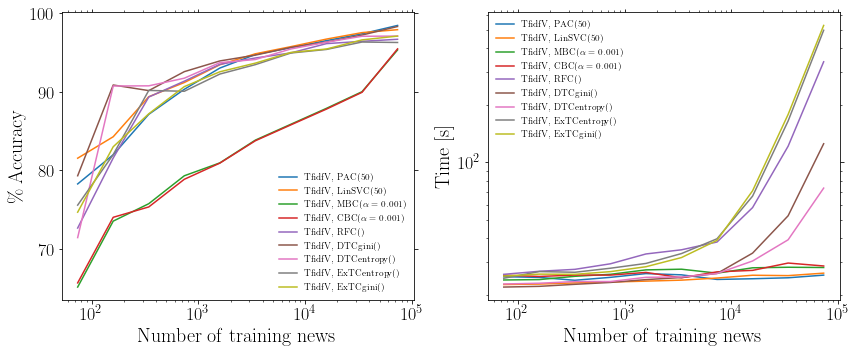

In [16]:
fig =plt.figure(1,figsize=(12,5))
ax = fig.add_subplot(121)
ax.set_xscale("log")

ax.plot(train_sizes*N_news,accuracies_PAC,label="$\mathrm{TfidfV},\;\mathrm{PAC(50)}$")
ax.plot(train_sizes*N_news,accuracies_LinSVC,label="$\mathrm{TfidfV},\;\mathrm{LinSVC(50)}$")
ax.plot(train_sizes*N_news,accuracies_MBC,label="$\mathrm{TfidfV},\;\mathrm{MBC}(\\alpha=%.3f)$" %alphaMBC)
ax.plot(train_sizes*N_news,accuracies_CBC,label="$\mathrm{TfidfV},\;\mathrm{CBC}(\\alpha=%.3f)$" %alphaCBC)
ax.plot(train_sizes*N_news,accuracies_RFC,label="$\mathrm{TfidfV},\;\mathrm{RFC}()$")
ax.plot(train_sizes*N_news,accuracies_DTC,label="$\mathrm{TfidfV},\;\mathrm{DTCgini}()$")
ax.plot(train_sizes*N_news,accuracies_DTCe,label="$\mathrm{TfidfV},\;\mathrm{DTCentropy}()$")
ax.plot(train_sizes*N_news,accuracies_ExTCe,label="$\mathrm{TfidfV},\;\mathrm{ExTCentropy}()$")
ax.plot(train_sizes*N_news,accuracies_ExTCg,label="$\mathrm{TfidfV},\;\mathrm{ExTCgini}()$")

ax.tick_params(labelsize=18)
ax.set_ylabel("$\%\:\mathrm{Accuracy} $", fontsize=20)
ax.set_xlabel("$\mathrm{Number\;of\;training\;news}$", fontsize=20)
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.legend(loc='best',  fontsize=9, frameon=False)


ax = fig.add_subplot(122)
ax.set_xscale("log")
ax.set_yscale("log")
ax.plot(train_sizes*N_news,times_PAC,label="$\mathrm{TfidfV},\;\mathrm{PAC(50)}$")
ax.plot(train_sizes*N_news,times_LinSVC,label="$\mathrm{TfidfV},\;\mathrm{LinSVC(50)}$")
ax.plot(train_sizes*N_news,times_MBC,label="$\mathrm{TfidfV},\;\mathrm{MBC}(\\alpha=%.3f)$" %alphaMBC)
ax.plot(train_sizes*N_news,times_CBC,label="$\mathrm{TfidfV},\;\mathrm{CBC}(\\alpha=%.3f)$" %alphaCBC)
ax.plot(train_sizes*N_news,times_RFC,label="$\mathrm{TfidfV},\;\mathrm{RFC}()$")
ax.plot(train_sizes*N_news,times_DTC,label="$\mathrm{TfidfV},\;\mathrm{DTCgini}()$")
ax.plot(train_sizes*N_news,times_DTCe,label="$\mathrm{TfidfV},\;\mathrm{DTCentropy}()$")
ax.plot(train_sizes*N_news,times_ExTCe,label="$\mathrm{TfidfV},\;\mathrm{ExTCentropy}()$")
ax.plot(train_sizes*N_news,times_ExTCg,label="$\mathrm{TfidfV},\;\mathrm{ExTCgini}()$")

ax.tick_params(labelsize=18)
ax.set_ylabel("$\mathrm{Time\;[s]} $", fontsize=20)
ax.set_xlabel("$\mathrm{Number\;of\;training\;news}$", fontsize=20)
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.legend(loc='best',  fontsize=9, frameon=False)

namefile="Classifiers.pdf"
fig.tight_layout()
fig.savefig(namefile,format="pdf")
subprocess.Popen(["evince",namefile]) 

# Careful analysis of PAC and LinSVC

In [7]:
Nt=30
train_sizes = np.logspace(np.log10(0.001),np.log10(0.99),Nt)
RS=[1,2,3,4,5] #random state to shuffle the news. One should average over these

N_rand=len(RS)

In [8]:
accuracies_PAC = np.zeros(Nt)
tns_PAC = np.zeros(Nt)
fps_PAC = np.zeros(Nt) 
fns_PAC = np.zeros(Nt)
tps_PAC = np.zeros(Nt)
times_PAC=np.zeros(Nt)

accuracies_LinSVC = np.zeros(Nt)
tns_LinSVC = np.zeros(Nt)
fps_LinSVC = np.zeros(Nt) 
fns_LinSVC = np.zeros(Nt)
tps_LinSVC = np.zeros(Nt)
times_LinSVC=np.zeros(Nt)
gc.collect()
for rs in RS:
    print("PAC")
    for i in range(Nt): 
        
        ts=train_sizes[i]
        start = time.time()
        #use both articles and titles
        x_train,x_test,y_train,y_test = \
            train_test_split(articles+titles,real_or_fake,train_size=ts, random_state=rs)

        #DataFlair - Initialize a TfidfVectorizer
        #we need to check the impact of max_df
        tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

        #DataFlair - Fit and transform train set, transform test set
        tfidf_train=tfidf_vectorizer.fit_transform(x_train.values.astype('U')) 
        tfidf_test=tfidf_vectorizer.transform(x_test.values.astype('U'))

        #DataFlair - Initialize a PassiveAggressiveClassifier

        #We need to check the impact of max_iter
        pac=PassiveAggressiveClassifier(max_iter=50,n_jobs=-1)
        pac.fit(tfidf_train,y_train)

        #DataFlair - Predict on the test set and calculate accuracy
        y_pred=pac.predict(tfidf_test)
        score=accuracy_score(y_test,y_pred)
        end=time.time()
        times_PAC[i]+=(end-start)
        accuracy= score*100.
        accuracies_PAC[i]+=accuracy

        n_t=N_news*ts


        #DataFlair - Build confusion matrix
        c_m=confusion_matrix(y_test,y_pred, labels=[0,1])
        tn, fp, fn, tp = c_m.ravel()
        n_t=N_news*ts
        n_test=N_news*(1.-ts)
        #DataFlair - Build confusion matrix
        c_m=confusion_matrix(y_test,y_pred, labels=[0,1])
        tn, fp, fn, tp = c_m.ravel()
        tns_PAC[i]+=(tn/n_test*100)
        fps_PAC[i]+=(fp/n_test*100)
        fns_PAC[i]+=(fn/n_test*100)
        tps_PAC[i]+=(tp/n_test*100)
        print("#training titles: %.f" % n_t,\
        "(%.2f%% of tot)" % (ts*100.),\
        "accuracy: %.2f%%" % accuracy ,", tn: %.2f%%" %(tn/n_test*100),\
              ", fp: %.2f%%" % (fp/n_test*100),", fn: %.2f%%" % (fn/n_test*100) ,\
              ", tp: %.2f%%" % (tp/n_test*100) ,", time: %.f s" % (end-start) ) 
        del x_train,x_test,y_train,y_test 
        del y_pred
        del tfidf_train, tfidf_test
        gc.collect()
   
    print("LinSVC")
    for i in range(Nt):
        
        ts=train_sizes[i]
        start = time.time()
        #use both articles and titles
        x_train,x_test,y_train,y_test = \
            train_test_split(articles+titles,real_or_fake,train_size=ts, random_state=rs)

        #DataFlair - Initialize a TfidfVectorizer
        #we need to check the impact of max_df
        tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

        #DataFlair - Fit and transform train set, transform test set
        tfidf_train=tfidf_vectorizer.fit_transform(x_train.values.astype('U')) 
        tfidf_test=tfidf_vectorizer.transform(x_test.values.astype('U'))

        #DataFlair - Initialize a PassiveAggressiveClassifier

        #We need to check the impact of max_iter
        pac=LinearSVC(max_iter=50)
        pac.fit(tfidf_train,y_train)

        #DataFlair - Predict on the test set and calculate accuracy
        y_pred=pac.predict(tfidf_test)
        score=accuracy_score(y_test,y_pred)

        end=time.time()
        times_LinSVC[i]+=(end-start)

        accuracy= score*100.
        accuracies_LinSVC[i]+=accuracy

        n_t=N_news*ts
        n_test=N_news*(1.-ts)
        #DataFlair - Build confusion matrix
        c_m=confusion_matrix(y_test,y_pred, labels=[0,1])
        tn, fp, fn, tp = c_m.ravel()
        tns_LinSVC[i]+=(tn/n_test*100)
        fps_LinSVC[i]+=(fp/n_test*100)
        fns_LinSVC[i]+=(fn/n_test*100)
        tps_LinSVC[i]+=(tp/n_test*100)
        print("#training titles: %.f" % n_t,\
        "(%.2f%% of tot)" % (ts*100.),\
        "accuracy: %.2f%%" % accuracy ,", tn: %.2f%%" %(tn/n_test*100),\
              ", fp: %.2f%%" % (fp/n_test*100),", fn: %.2f%%" % (fn/n_test*100) ,\
              ", tp: %.2f%%" % (tp/n_test*100) ,", time: %.f s" % (end-start) ) 
        del x_train,x_test,y_train,y_test 
        del y_pred
        del tfidf_train, tfidf_test
        gc.collect()
    gc.collect()
    print("****************************************************")
### Average over random trials


    
accuracies_PAC /=  N_rand
tns_PAC /=   N_rand
fps_PAC /=   N_rand
fns_PAC /=   N_rand
tps_PAC /=   N_rand
times_PAC/=  N_rand

accuracies_LinSVC /=   N_rand
tns_LinSVC /=   N_rand
fps_LinSVC /=  N_rand
fns_LinSVC /=   N_rand
tps_LinSVC /=   N_rand
times_LinSVC/=  N_rand

PAC
#training titles: 74 (0.10% of tot) accuracy: 77.63% , tn: 43.09% , fp: 6.20% , fn: 16.16% , tp: 34.54% , time: 24 s
#training titles: 94 (0.13% of tot) accuracy: 79.84% , tn: 42.27% , fp: 7.03% , fn: 13.13% , tp: 37.57% , time: 22 s
#training titles: 119 (0.16% of tot) accuracy: 82.21% , tn: 42.77% , fp: 6.53% , fn: 11.26% , tp: 39.44% , time: 22 s
#training titles: 151 (0.20% of tot) accuracy: 83.92% , tn: 43.44% , fp: 5.86% , fn: 10.22% , tp: 40.48% , time: 24 s
#training titles: 192 (0.26% of tot) accuracy: 84.14% , tn: 43.84% , fp: 5.46% , fn: 10.40% , tp: 40.30% , time: 22 s
#training titles: 243 (0.33% of tot) accuracy: 86.13% , tn: 43.24% , fp: 6.06% , fn: 7.81% , tp: 42.88% , time: 24 s
#training titles: 308 (0.42% of tot) accuracy: 87.10% , tn: 43.79% , fp: 5.52% , fn: 7.38% , tp: 43.31% , time: 22 s
#training titles: 391 (0.53% of tot) accuracy: 87.58% , tn: 44.04% , fp: 5.26% , fn: 7.16% , tp: 43.54% , time: 23 s
#training titles: 496 (0.67% of tot) accuracy: 87.76% , t

#training titles: 629 (0.85% of tot) accuracy: 89.52% , tn: 45.09% , fp: 4.21% , fn: 6.27% , tp: 44.42% , time: 29 s
#training titles: 798 (1.08% of tot) accuracy: 90.62% , tn: 45.25% , fp: 4.06% , fn: 5.32% , tp: 45.37% , time: 24 s
#training titles: 1013 (1.37% of tot) accuracy: 91.62% , tn: 45.53% , fp: 3.78% , fn: 4.60% , tp: 46.09% , time: 27 s
#training titles: 1285 (1.74% of tot) accuracy: 92.30% , tn: 45.64% , fp: 3.70% , fn: 3.99% , tp: 46.66% , time: 23 s
#training titles: 1630 (2.20% of tot) accuracy: 92.95% , tn: 45.66% , fp: 3.69% , fn: 3.35% , tp: 47.30% , time: 23 s
#training titles: 2067 (2.79% of tot) accuracy: 93.33% , tn: 45.99% , fp: 3.36% , fn: 3.31% , tp: 47.34% , time: 24 s
#training titles: 2622 (3.54% of tot) accuracy: 93.85% , tn: 46.16% , fp: 3.20% , fn: 2.95% , tp: 47.69% , time: 24 s
#training titles: 3327 (4.50% of tot) accuracy: 94.47% , tn: 46.40% , fp: 2.96% , fn: 2.57% , tp: 48.07% , time: 24 s
#training titles: 4220 (5.70% of tot) accuracy: 94.82% , t

#training titles: 5353 (7.23% of tot) accuracy: 95.13% , tn: 46.57% , fp: 2.77% , fn: 2.10% , tp: 48.56% , time: 24 s
#training titles: 6790 (9.18% of tot) accuracy: 95.50% , tn: 46.81% , fp: 2.53% , fn: 1.98% , tp: 48.69% , time: 24 s
#training titles: 8614 (11.64% of tot) accuracy: 95.78% , tn: 46.87% , fp: 2.49% , fn: 1.73% , tp: 48.91% , time: 24 s
#training titles: 10927 (14.77% of tot) accuracy: 96.15% , tn: 47.10% , fp: 2.21% , fn: 1.64% , tp: 49.05% , time: 24 s
#training titles: 13861 (18.73% of tot) accuracy: 96.52% , tn: 47.26% , fp: 2.02% , fn: 1.46% , tp: 49.26% , time: 24 s
#training titles: 17582 (23.76% of tot) accuracy: 96.75% , tn: 47.40% , fp: 1.85% , fn: 1.40% , tp: 49.35% , time: 24 s
#training titles: 22304 (30.14% of tot) accuracy: 96.93% , tn: 47.49% , fp: 1.77% , fn: 1.30% , tp: 49.44% , time: 24 s
#training titles: 28293 (38.23% of tot) accuracy: 97.30% , tn: 47.68% , fp: 1.58% , fn: 1.12% , tp: 49.62% , time: 24 s
#training titles: 35890 (48.50% of tot) accur

#training titles: 45527 (61.52% of tot) accuracy: 97.79% , tn: 48.25% , fp: 1.27% , fn: 0.94% , tp: 49.54% , time: 24 s
#training titles: 57752 (78.04% of tot) accuracy: 98.02% , tn: 48.16% , fp: 1.18% , fn: 0.79% , tp: 49.87% , time: 25 s
#training titles: 73260 (99.00% of tot) accuracy: 98.78% , tn: 51.76% , fp: 0.41% , fn: 0.81% , tp: 47.03% , time: 40 s
LinSVC
#training titles: 74 (0.10% of tot) accuracy: 70.40% , tn: 46.81% , fp: 2.48% , fn: 27.12% , tp: 23.59% , time: 24 s
#training titles: 94 (0.13% of tot) accuracy: 74.35% , tn: 44.86% , fp: 4.43% , fn: 21.22% , tp: 29.49% , time: 28 s
#training titles: 119 (0.16% of tot) accuracy: 78.35% , tn: 43.32% , fp: 5.97% , fn: 15.68% , tp: 35.03% , time: 27 s
#training titles: 151 (0.20% of tot) accuracy: 79.76% , tn: 43.63% , fp: 5.65% , fn: 14.59% , tp: 36.13% , time: 23 s
#training titles: 192 (0.26% of tot) accuracy: 81.85% , tn: 42.78% , fp: 6.51% , fn: 11.64% , tp: 39.08% , time: 22 s
#training titles: 243 (0.33% of tot) accuracy

#training titles: 308 (0.42% of tot) accuracy: 88.31% , tn: 44.39% , fp: 4.89% , fn: 6.80% , tp: 43.91% , time: 23 s
#training titles: 391 (0.53% of tot) accuracy: 88.39% , tn: 45.10% , fp: 4.18% , fn: 7.43% , tp: 43.29% , time: 30 s
#training titles: 496 (0.67% of tot) accuracy: 89.86% , tn: 44.83% , fp: 4.45% , fn: 5.69% , tp: 45.03% , time: 28 s
#training titles: 629 (0.85% of tot) accuracy: 90.43% , tn: 44.93% , fp: 4.33% , fn: 5.24% , tp: 45.50% , time: 23 s
#training titles: 798 (1.08% of tot) accuracy: 91.47% , tn: 45.56% , fp: 3.69% , fn: 4.84% , tp: 45.91% , time: 23 s
#training titles: 1013 (1.37% of tot) accuracy: 92.17% , tn: 45.33% , fp: 3.93% , fn: 3.91% , tp: 46.83% , time: 24 s
#training titles: 1285 (1.74% of tot) accuracy: 92.77% , tn: 45.40% , fp: 3.86% , fn: 3.37% , tp: 47.37% , time: 24 s
#training titles: 1630 (2.20% of tot) accuracy: 93.49% , tn: 45.41% , fp: 3.85% , fn: 2.66% , tp: 48.07% , time: 23 s
#training titles: 2067 (2.79% of tot) accuracy: 93.86% , tn: 

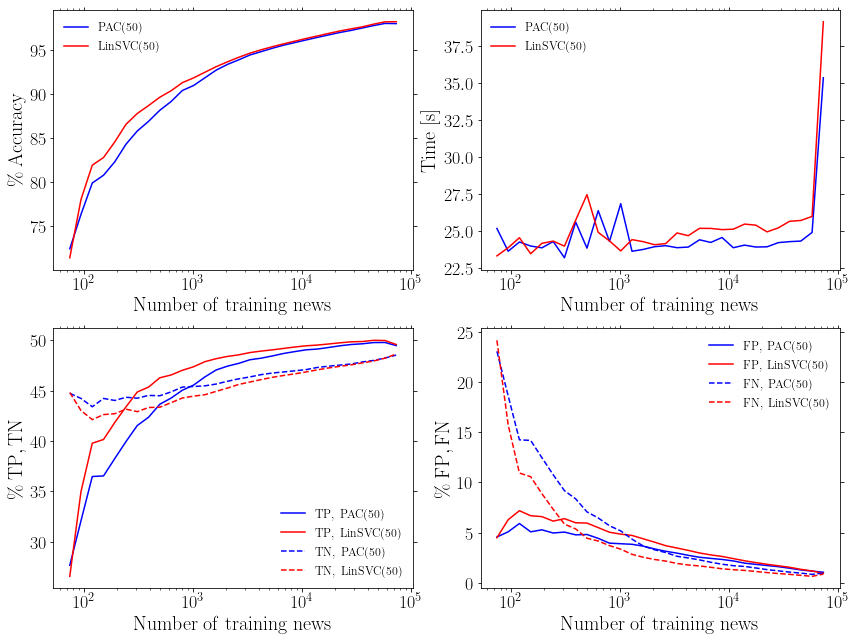

In [9]:
fig =plt.figure(2,figsize=(12,9))
ax = fig.add_subplot(221)
ax.set_xscale("log")

ax.plot(train_sizes*N_news,accuracies_PAC,label="$ \mathrm{PAC(50)}$",color="b")
ax.plot(train_sizes*N_news,accuracies_LinSVC,label="$ \mathrm{LinSVC(50)}$",color="r")

ax.tick_params(labelsize=18)
ax.set_ylabel("$\%\:\mathrm{Accuracy} $", fontsize=20)
ax.set_xlabel("$\mathrm{Number\;of\;training\;news}$", fontsize=20)
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.legend(loc='best',  fontsize=12, frameon=False)


ax = fig.add_subplot(222)
ax.set_xscale("log")
#ax.set_yscale("log")
ax.plot(train_sizes*N_news,times_PAC,label="$ \mathrm{PAC(50)}$",color="b")
ax.plot(train_sizes*N_news,times_LinSVC,label="$ \mathrm{LinSVC(50)}$",color="r")

ax.tick_params(labelsize=18)
ax.set_ylabel("$\mathrm{Time\;[s]} $", fontsize=20)
ax.set_xlabel("$\mathrm{Number\;of\;training\;news}$", fontsize=20)
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.legend(loc='best',  fontsize=12, frameon=False)

ax = fig.add_subplot(223)
ax.set_xscale("log")
#ax.set_yscale("log")
ax.plot(train_sizes*N_news,tps_PAC,label="$ \mathrm{TP,\;PAC(50)}$",color="b")
ax.plot(train_sizes*N_news,tps_LinSVC,label="$ \mathrm{TP,\;LinSVC(50)}$",color="r")
ax.plot(train_sizes*N_news,tns_PAC,label="$ \mathrm{TN,\;PAC(50)}$",ls="--",color="b")
ax.plot(train_sizes*N_news,tns_LinSVC,label="$ \mathrm{TN,\;LinSVC(50)}$",ls="--",color="r")

ax.tick_params(labelsize=18)
ax.set_ylabel("$\%\:\mathrm{TP,TN} $", fontsize=20)
ax.set_xlabel("$\mathrm{Number\;of\;training\;news}$", fontsize=20)
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.legend(loc='best',  fontsize=12, frameon=False)

ax = fig.add_subplot(224)
ax.set_xscale("log")
#ax.set_yscale("log")
ax.plot(train_sizes*N_news,fps_PAC,label="$ \mathrm{FP,\;PAC(50)}$",color="b")
ax.plot(train_sizes*N_news,fps_LinSVC,label="$ \mathrm{FP,\;LinSVC(50)}$",color="r")
ax.plot(train_sizes*N_news,fns_PAC,label="$ \mathrm{FN,\;PAC(50)}$",ls="--",color="b")
ax.plot(train_sizes*N_news,fns_LinSVC,label="$ \mathrm{FN,\;LinSVC(50)}$",ls="--",color="r")

ax.tick_params(labelsize=18)
ax.set_ylabel("$\%\:\mathrm{FP,FN} $", fontsize=20)
ax.set_xlabel("$\mathrm{Number\;of\;training\;news}$", fontsize=20)
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.legend(loc='best',  fontsize=12, frameon=False)

namefile="PAC_vs_LinSVC.pdf"
fig.tight_layout()
fig.savefig(namefile,format="pdf")
subprocess.Popen(["evince",namefile]) 

# Analysis based on titles and articles 

There might be news which are classified in a different way depending on the title and the article.  

In [18]:
accuracies_PAC=[]
accuracies_LinSVC=[]

times_PAC=[]
times_LinSVC=[]


def clickbaitness(df,\
                  preprocessor=TfidfVectorizer(stop_words='english', max_df=0.7),
                  classifier=PassiveAggressiveClassifier(max_iter=50,n_jobs=-1),rs=rs ):

    real_or_fake=df.value
    titles=df.title
    articles=df.article
    
    #use titles
    accuracies_t = []
    tns_t = []
    fps_t = [] 
    fns_t = []
    tps_t = []
    start=time.time()


    
    x_train_t,x_test_t,y_train_t,y_test_t = \
        train_test_split(titles,real_or_fake,train_size=ts, random_state=rs)

    tfidf_vectorizer=preprocessor

    tfidf_train_t=tfidf_vectorizer.fit_transform(x_train_t.values.astype('U')) 
    tfidf_test_t=tfidf_vectorizer.transform(x_test_t.values.astype('U'))


    pac=classifier
    pac.fit(tfidf_train_t,y_train_t)

    y_pred_t=pac.predict(tfidf_test_t)
    end=time.time()
    score=accuracy_score(y_test_t,y_pred_t)

    times_PAC.append(end-start)
    accuracy= score*100.
    accuracies_PAC.append(accuracy)

    n_t=N_news*ts


    #DataFlair - Build confusion matrix
    c_m_t=confusion_matrix(y_test_t,y_pred_t, labels=[0,1])
    tn_t, fp_t, fn_t, tp_t = c_m_t.ravel()
    tns_t.append(tn_t)
    fps_t.append(fp_t)
    fns_t.append(fn_t)
    tps_t.append(tp_t)
    print("#training titles: %.f" % n_t,\
         "(%.2f%% of tot)" % (ts*100.),\
         "accuracy: %.2f%%" % accuracy ,", tn:",tn_t,", fp:", fp_t,", fn:", fn_t,", tp:", tp_t ,", time: %.f s" % (end-start) ) 

    gc.collect()
    
    
    #use articles
    accuracies_a = []
    tns_a = []
    fps_a = [] 
    fns_a = []
    tps_a = []

    start=time.time()


    x_train_a,x_test_a,y_train_a,y_test_a = \
        train_test_split(articles,real_or_fake,train_size=ts, random_state=rs)

    tfidf_vectorizer=preprocessor

    tfidf_train_a=tfidf_vectorizer.fit_transform(x_train_a.values.astype('U')) 
    tfidf_test_a=tfidf_vectorizer.transform(x_test_a.values.astype('U'))


    pac=classifier
    pac.fit(tfidf_train_a,y_train_a)

    y_pred_a=pac.predict(tfidf_test_a)
    end=time.time()
    score=accuracy_score(y_test_a,y_pred_a)

    times_PAC.append(end-start)
    accuracy= score*100.
    accuracies_PAC.append(accuracy)

    n_a=N_news*ts


    #DataFlair - Build confusion matrix
    c_m_a=confusion_matrix(y_test_a,y_pred_a, labels=[0,1])
    tn_a, fp_a, fn_a, tp_a = c_m_a.ravel()
    tns_a.append(tn_a)
    fps_a.append(fp_a)
    fns_a.append(fn_a)
    tps_a.append(tp_a)
    print("#training articles: %.f" % n_a,\
         "(%.2f%% of tot)" % (ts*100.),\
         "accuracy: %.2f%%" % accuracy ,", tn:",tn_a,"fp:", fp_a,", fn:", fn_a,", tp:", tp_a , ", time: %.f s" % (end-start) )
    gc.collect()      
    
    
    
    #now analyze the predictions
    t_fake_a_real_n_real=0
    t_fake_a_real_n_fake=0
    t_real_a_fake_n_real=0
    t_real_a_fake_n_fake=0
    agreement_n_fake=0
    agreement_n_real=0

    N_tested_news=len(y_test_a.values)
    for i in range(len(y_pred_a)):
        yp_a=y_pred_a[i]
        yp_t=y_pred_t[i]
        d_a=y_test_a.values[i]
        d_t=y_test_t.values[i]
        #check if d_a=d_t

        if(d_a != d_t):
            print("Titles and articles are mismatched")
            return
        if(yp_a==yp_t and d_a==1):
            agreement_n_real+=1
        elif(yp_a==yp_t and d_a==0):
            agreement_n_fake+=1
        elif(yp_a!=yp_t and d_a==1):
            if(yp_t==1):
                t_real_a_fake_n_real+=1
            else:
                t_fake_a_real_n_real+=1
        elif(yp_a!=yp_t and d_a==0):
            if(yp_t==1):
                t_real_a_fake_n_fake+=1
            else:
                t_fake_a_real_n_fake+=1
    
    pos_clickbait=(t_fake_a_real_n_real/N_tested_news*100.)
    neg_clickbait=( t_real_a_fake_n_fake/N_tested_news*100.)
    cheating=(t_fake_a_real_n_fake/N_tested_news*100.)
    bad_written=(t_real_a_fake_n_real/N_tested_news*100.)
    agreement_real=( agreement_n_real/N_tested_news*100.)
    agreement_fake=(agreement_n_fake/N_tested_news*100.)
    tot_agreement=((agreement_n_fake+agreement_n_real)/N_tested_news*100.)
    
    return pos_clickbait,neg_clickbait,cheating,bad_written,agreement_real,agreement_fake,tot_agreement

In [19]:
rs=11 #random state
ts=0.7 #test size
print("PAC:")
pos_clickbait,neg_clickbait,cheating,bad_written,\
agreement_real,agreement_fake,tot_agreement\
        =clickbaitness(df,\
              TfidfVectorizer(stop_words='english', max_df=0.7),\
              PassiveAggressiveClassifier(max_iter=50,n_jobs=-1),\
              rs)
   

print("probable clickbait (positive, to attract readers) ->","%.2f" % pos_clickbait ,"%"
    "\nthe content of article was convincing,title was right (cheat)->","%.2f" % cheating ,"%"
    "\nthe content of article was misleading, title was right (bad written news)->","%.2f" %bad_written ,"%"
    "\nprobable clickbait (negative, to cheat readers) ->","%.2f" % neg_clickbait,"%"
    "\nagreement between titles and articles, the news is REAL->","%.2f" % agreement_real,"%"
    "\nagreement between titles and articles, the news is FAKE->","%.2f" % agreement_fake,"%",
     "\ntotal agreement" ,"%.2f" % tot_agreement,"%",   )     

PAC:
#training titles: 51800 (70.00% of tot) accuracy: 90.21% , tn: 9914 , fp: 1150 , fn: 1023 , tp: 10113 , time: 2 s
#training articles: 51800 (70.00% of tot) accuracy: 96.26% , tn: 10464 fp: 600 , fn: 230 , tp: 10906 , time: 25 s
probable clickbait (positive, to attract readers) -> 4.13 %
the content of article was convincing,title was right (cheat)-> 2.17 %
the content of article was misleading, title was right (bad written news)-> 0.55 %
probable clickbait (negative, to cheat readers) -> 4.64 %
agreement between titles and articles, the news is REAL-> 45.48 %
agreement between titles and articles, the news is FAKE-> 43.03 % 
total agreement 88.51 %


In [20]:
print("LinearSVC:")
pos_clickbait,neg_clickbait,cheating,bad_written,\
agreement_real,agreement_fake,tot_agreement\
        =clickbaitness(df,\
              TfidfVectorizer(stop_words='english', max_df=0.7),\
              LinearSVC(max_iter=50),\
              rs)

print("probable clickbait (positive, to attract readers) ->","%.2f" % pos_clickbait ,"%"
    "\nthe content of article was convincing,title was right (cheat)->","%.2f" % cheating ,"%"
    "\nthe content of article was misleading, title was right (bad written news)->","%.2f" %bad_written ,"%"
    "\nprobable clickbait (negative, to cheat readers) ->","%.2f" % neg_clickbait,"%"
    "\nagreement between titles and articles, the news is REAL->","%.2f" % agreement_real,"%"
    "\nagreement between titles and articles, the news is FAKE->","%.2f" % agreement_fake,"%",
     "\ntotal agreement" ,"%.2f" % tot_agreement,"%",   ) 

LinearSVC:
#training titles: 51800 (70.00% of tot) accuracy: 91.97% , tn: 10021 , fp: 1043 , fn: 740 , tp: 10396 , time: 2 s
#training articles: 51800 (70.00% of tot) accuracy: 96.32% , tn: 10507 fp: 557 , fn: 261 , tp: 10875 , time: 27 s
probable clickbait (positive, to attract readers) -> 2.82 %
the content of article was convincing,title was right (cheat)-> 2.09 %
the content of article was misleading, title was right (bad written news)-> 0.66 %
probable clickbait (negative, to cheat readers) -> 4.28 %
agreement between titles and articles, the news is REAL-> 46.69 %
agreement between titles and articles, the news is FAKE-> 43.47 % 
total agreement 90.16 %
